In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [133]:
def NMF(V, n_components):
    height, width = V.shape[0], V.shape[1]
    epsilon = 0.0001

    W = np.random.rand(height, n_components) + epsilon
    H = np.random.rand(n_components, width) + epsilon
        
    for _ in range(100):
        numerator = W.T @ V
        denominator = W.T @ W @ H
        for i in range(n_components):
            for j in range(width):
                H[i, j] = H[i, j] * (numerator[i, j] / denominator[i, j])

        numerator = V @ H.T
        denominator = W @ H @ H.T   
        for i in range(height):
            for j in range(n_components):
                W[i, j] = W[i, j] * (numerator[i, j] / denominator[i, j])
                
    return W, H

In [134]:
V = np.random.rand(50, 50)

Text(0.5, 1.0, 'Original Data')

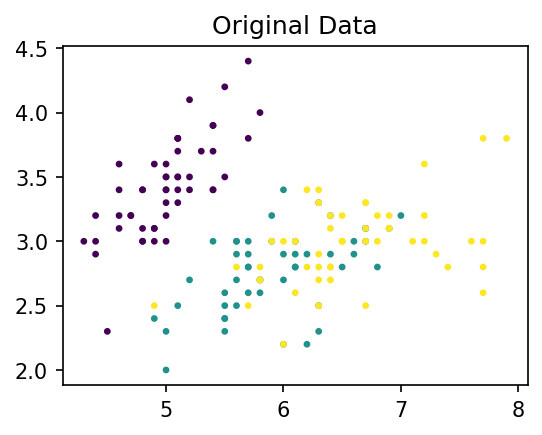

In [135]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(num=1, figsize=(4,3), dpi=150)
ax = fig.add_subplot()
ax.scatter(X[:, 0], X[:, 1], c=y, s=5)
ax.set_title("Original Data")

Text(0.5, 1.0, 'Data after PCA')

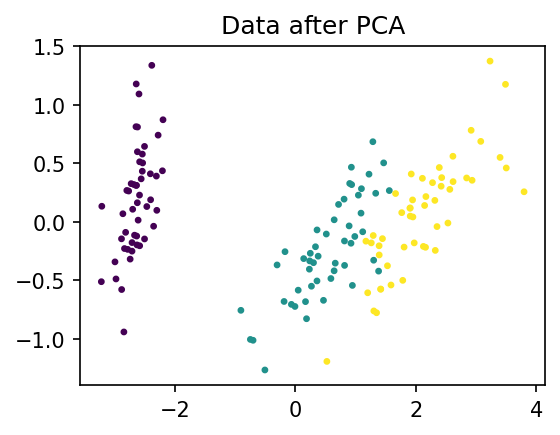

In [136]:
from sklearn.decomposition import NMF as sklearn_NMF
from sklearn.decomposition import PCA


pca = PCA(n_components=4)
pca.fit(X)
X_after_pca = pca.transform(X)

fig = plt.figure(num=2, figsize=(4,3), dpi=150)
ax2 = fig.add_subplot()
ax2.scatter(X_after_pca[:, 0], X_after_pca[:, 1], c=y, s=5)
ax2.set_title("Data after PCA")

Text(0.5, 1.0, 'Data after NMF - Sklearn')

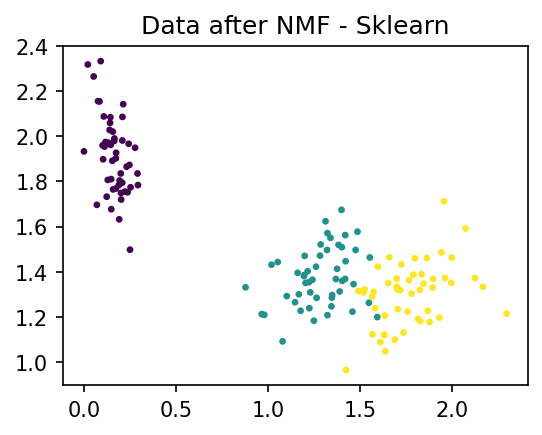

In [182]:
model = sklearn_NMF(n_components=2, init='random', random_state=0, max_iter=1000)

model.fit(X)
nmf_features = model.transform(X)

fig = plt.figure(num=2, figsize=(4,3), dpi=150)
ax2 = fig.add_subplot()
ax2.scatter(nmf_features[:, 0], nmf_features[:, 1], c=y, s=5)
ax2.set_title("Data after NMF - Sklearn")

Text(0.5, 1.0, 'Data after NMF - Own Implementation')

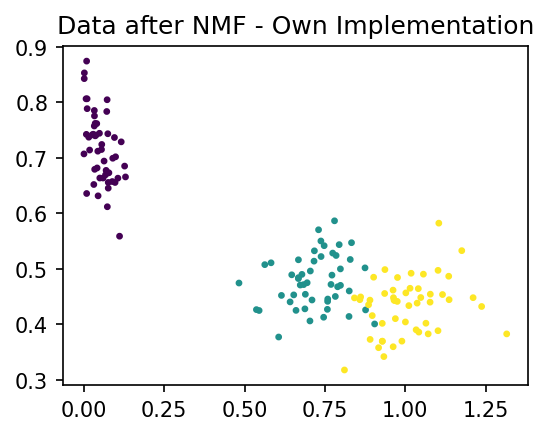

In [185]:
W, H = NMF(X, n_components=2)

fig = plt.figure(num=2, figsize=(4,3), dpi=150)
ax2 = fig.add_subplot()
ax2.scatter(W[:, 0], W[:, 1], c=y, s=5)
ax2.set_title("Data after NMF - Own Implementation")

(6, 4096)


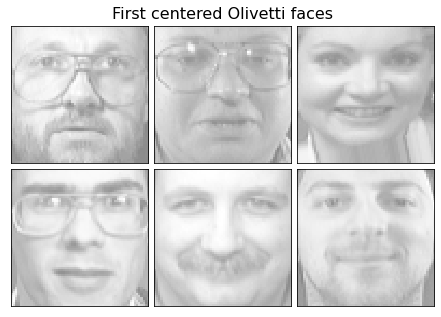

In [187]:
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState

n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape
faces_centered = faces - faces.mean(axis=0)

def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2.0 * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(
            comp.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.0)

plot_gallery("First centered Olivetti faces", faces[:n_components])
print(components_.shape)


(6, 4096)


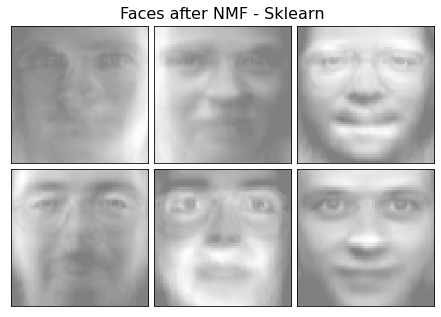

In [186]:
model = sklearn_NMF(n_components=n_components, init='nndsvda', random_state=0, max_iter=10000)

model.fit(faces)
components_ = model.components_
print(components_.shape)
plot_gallery("Faces after NMF - Sklearn", components_[:n_components])

(6, 4096)


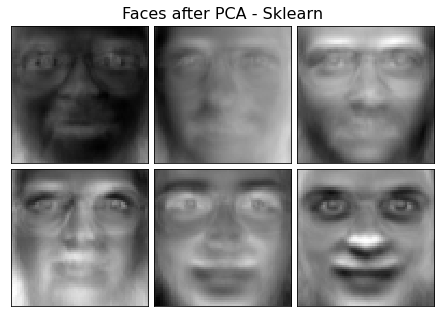

In [177]:
model = PCA(n_components=n_components)

model.fit(faces)
components_ = model.components_
plot_gallery("Faces after PCA - Sklearn", components_[:n_components])
print(components_.shape)

(6, 4096)


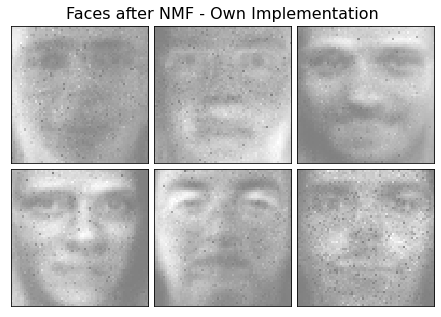

In [179]:
_, components_ = NMF(faces, n_components=n_components)
print(components_.shape)
plot_gallery("Faces after NMF - Own Implementation", components_[:n_components])